# Machine translation with Vectors

## Introduction

This is a project dedicated to Machine Translation (MT) based on this [TensorFlow](https://www.tensorflow.org/text/tutorials/nmt_with_attention) tutorial.

The MT history summary is aided by this [article](https://www.freecodecamp.org/news/a-history-of-machine-translation-from-the-cold-war-to-deep-learning-f1d335ce8b5/) from FreeCodeCamp.

| ![History of MT image](https://miro.medium.com/v2/resize:fit:1400/1*XuR_iuPOuY-8i5A3cGmcBw.png) |
|:--:|
| <b>History of Machine Translation</b>|

My name is Ivaylo Radev and my involvement in the field of Natural Language Processing (NLP) began in the summer of 2011, right after I finished my bachelor degree in Bulgarian Philology. Up until January 2022 I was working purely as linguist on creating various language resources mainly WordNet for Bulgarian language since 2014. In February 2022 I started to learn Python in order to become "true" computational linguist. Computational linguistics is a coin that combines the sides of Linguistics and Computer science. For 10 years I was looking solely to one side and decided to peek at the other. I do not know much of Machine Learning and Word Embeddings and my math knowledge is limited, but I want to give it a try and see what can I learn.


#### Statistical Machine Translation

At that time (2011) the Statistical Machine Translation (SMT) approach was the state-of-the-art and my first task was to align Bulgarian-English sentence pairs from the [SETIMES corpus](https://opus.nlpl.eu/SETIMES.php) extracted from news articles written on the both languages.

| ![Word Alignment image](https://cdn-media-1.freecodecamp.org/images/jG95Sgc2W4VJbwi4LFlJeMHnjLZbdGydCCzI) |
|:--:|
| <b>Word Alignment</b>|

The Statistical Machine Translation is  based on the idea that a machine can infer patterns if an pair of identical sentences on two languages is split into words. These words are then linked, creating weights between each of the words in the other language sentence. Applying this method millions or even billions of times results in the count of how many times a word from language A is translated into word1, word2 or word3 in language B. These counts are then normalized and transformed into weights with values between 0 and 1. For example the English word *bank* can have {банка : 0.91, бряг : 0.65, боб : 0.01} weights for Bulgarian.
The main problems of SMT are the need of large amount of sentence pairs, did not understand cases, gender, homonymy and word order, but most importantly was using only the most common translations making errors in examples like *He was fishing from the bank* - *Той ловеше риба от __банката__*.
To combat these shortcomings the Phrase-based SMT (splitting the sentences into phrases or n-grams/n-words in a row) and Syntax-based SMT (converting the sentences into sentence tree and then translate one tree into another).

| ![sentence tree image](https://cdn-media-1.freecodecamp.org/images/JKfKjepj-r-NgsmX7A1qipPF7Jb1LEJYghAQ) |
|:--:|
| <b>Translating trees</b>|


#### Neural Machine Translation

The Syntax-based SMT was considered the best approach to MT before the emergence of machine translation with Neural Networks (NNs) or Neural Machine Translation (NMT). The first time I was introduced to NMT was sometime in 2017.

| ![NMT image](https://cdn-media-1.freecodecamp.org/images/2TRCJS9nG0g1YVZPzbeg3DKvZLgsMEEiBXRs) |
|:--:|
| <b>Neural Network Translation</b>|

The Neural Machine Translation uses method similar to Syntax-based SMT. It takes sentences or texts and converts them to numerical representation instead to syntax trees. NMT works by encoding (by Encoder NN) some text in language A into features (vectors) and decoding (by Decoder NN) these features into language B.

Machines are not capable of processing strings or plain text in their raw form and require numerical numbers as inputs to perform any sort of task, such as classification, regression, clustering, etc. Vectorization or word embedding is the process of converting text data to numerical vectors. The simplest way to represent the word *apple* from the sentence *The green apple is tasty.* is to set the vector dimension equal of the length of the sentence and mark the position of the targeted word: apple = [0, 0, 1, 0, 0, 0]. Keep in mind that sentences are split into string tokens that separate words and punctuation. This example is very basic as the large NNs use 300, 1000 or more dimensional vectors (or matrixes with these vectors) and encode the whole (or large percent of) vocabulary of given language.

The Bag-of-Words approach sts the vector size for a particular document to be equal to the number of unique words present in the corpus of all documents. Then for each entry of a vector is filled with the corresponding word frequency in a particular document resulting in sparse matrix.
 
| ![Matrix image](https://editor.analyticsvidhya.com/uploads/12860Screenshot%202021-06-15%20at%205.16.36%20PM.png) |
|:--:|
| <b>Matrix with Text Representations</b>|




In [6]:
# Lets see it in code
from sklearn.feature_extraction.text import CountVectorizer
# corpus = document1, document2, ..., documentN
corpus = ["this pasta is very tasty and affordable", "this pasta is not tasty and is affordable", "this pasta is very very delicious"]
count_vectors = CountVectorizer()
result = count_vectors.fit_transform(corpus)
result_matrix = result.toarray()
print(result_matrix)


[[1 1 0 1 0 1 1 1 1]
 [1 1 0 2 1 1 1 1 0]
 [0 0 1 1 0 1 0 1 2]]


Once we have the representations of the vocabularies (populate our embedding with vectors) on more then one language we can do translation by taking the vector for given word in language A and finding the same vector in language B. The most commonly used metric for comparing two vectors is Cosine Similarity.
Cosine Similarity is the cosine of the angle between the vectors. If $cos(0) = 1$ the vectors are on the same line and direction and are similar. If $cos(90) = 0$ the vectors are orthogonal and not similar. If $cos(180) = -1$ the vectors are entirely dissimilar. Hence if angle θ is 0 <= Cos(θ) <= 1 the vectors are similar (more similar closer to 0). Since distance and similarity are not the same, the distance metric can be defined using cosine similarity as $$d = 1 -cos (u, v)$$ 
This will result in function that accepts the word vector ($w$) and returns the closest vector ($c$) $$f(w) = c$$ where $w$ is the source word and $c$ is the translated word. 

#### Sequence-to-Sequence

The Sequence-to-Sequence or Seq2seq is a family of machine learning approaches used for natural language processing. It uses Recurrent Neural Networks (RNN) and Long short-term memory (LSTM). The RNNs are a class of artificial neural networks where connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. They are good for NLP tasks as they can feed context - in this case the  result of the previous word in the text. The LSTMs are a type of RNNs that has the ability to remember and forget previous results based on time intervals or forget gates.

The Seq2seq can be optimized with:

* Attention: The input to the decoder is a single vector which stores the entire context. Attention allows the decoder to look at the input sequence selectively.
    
* Beam Search: Instead of picking the single output (word) as the output, multiple highly probable choices are retained, structured as a tree (using a Softmax on the set of attention scores). Average the encoder states weighted by the attention distribution.

* Bucketing: Variable-length sequences are possible because of padding with 0s, which may be done to both input and output. However, if the sequence length is 100 and the input is just 3 items long, expensive space is wasted. Buckets can be of varying sizes and specify both input and output lengths.



## Machine Translation with TensorFlow

### TensorFlow
TensorFlow is a open-source software library for machine learning and artificial intelligence. It has sequence-to-sequence (seq2seq) model for English-to-OtherLanguage translations with attention mechanisms. Let's try to implement it here with English and Bulgarian.

In [ ]:
# First install the libraries. Once installed they can be left.
#!pip install einops
#!pip install tensorflow
#!pip install tensorflow-text

In [1]:
import numpy as np

import typing
from typing import Any, Tuple

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import einops

import tensorflow as tf
import tensorflow_text as tf_text

import pathlib


Before we begin:

This notebook uses a lot of low level API's where it's easy to get shapes wrong. This class is used to check shapes throughout the notebook.

In [53]:
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)

      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")


The data for comes from the [Anki Dataset](http://www.manythings.org/anki/). It contains language translation pairs in the format: 
English + TAB + The Other Language + TAB + Attribution

"This work isn't easy.	この仕事は簡単じゃない。	CC-BY 2.0 (France) Attribution: tatoeba.org #3737550 (CK) & #7977622 (Ninja)

Those are sunflowers.	それはひまわりです。	CC-BY 2.0 (France) Attribution: tatoeba.org #441940 (CK) & #205407 (arnab)"


In [2]:
# Load the data
#link - http://www.manythings.org/anki/bul-eng.zip


path_to_zip = tf.keras.utils.get_file(
    'bul-eng.zip', origin='http://www.manythings.org/anki/bul-eng.zip',
    extract=True)

path_to_file = pathlib.Path(path_to_zip).parent/'bul-eng/bul.txt'

def load_data(path):
  text = path.read_text(encoding='utf-8')

  lines = text.splitlines()
  pairs = [line.split('\t') for line in lines]

  context = np.array([context for target, context, _meta in pairs]) #Take Bulgarian sentences as numpy array of strings
  target = np.array([target for target, context, _meta in pairs]) #Take English sentences as array and leave the rest to rest

  return target, context

In [3]:
#Test if the data is loaded
target_raw, context_raw = load_data(path_to_file)
print(context_raw[-1])
print(target_raw[-1])


Понеже обикновено могат да се намерят много уебсайтове на дадена тема, обикновено кликвам бутона "Назад", когато попадна на някоя уебстраница с изскачащи реклами. Просто отивам на следващата страница, която ми предлага Google, и се надявам тя да дразни по-малко.
Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.


 From these arrays of strings a tf.data.Dataset of strings can be crated. This is a large set of elements that shuffles and batches them efficiently.

In [4]:
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 64

is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[is_train], target_raw[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))


In [5]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor(
[b'\xd0\x9d\xd0\xb5 \xd0\xbf\xd1\x80\xd0\xbe\xd1\x8f\xd0\xb2\xd1\x8f\xd0\xb2\xd0\xb0\xd1\x82\xd0\xb5 \xd0\xbb\xd0\xb8 \xd0\xb8\xd0\xbd\xd1\x82\xd0\xb5\xd1\x80\xd0\xb5\xd1\x81?'
 b'\xd0\xa4\xd1\x80\xd0\xb5\xd0\xbd\xd1\x81\xd0\xba\xd0\xb8\xd1\x8f\xd1\x82 \xd0\xb5 \xd0\xb4\xd0\xbe\xd1\x81\xd1\x82\xd0\xb0 \xd1\x82\xd1\x80\xd1\x83\xd0\xb4\xd0\xb5\xd0\xbd, \xd0\xbd\xd0\xb0\xd0\xbb\xd0\xb8?'
 b'\xd0\xa2\xd0\xbe\xd0\xbc \xd0\xb6\xd0\xb8\xd0\xb2\xd0\xb5\xd0\xb5 \xd0\xbc\xd0\xb0\xd0\xbb\xd0\xba\xd0\xbe \xd0\xbf\xd0\xbe-\xd0\xbd\xd0\xb0\xd0\xb4\xd0\xbe\xd0\xbb\xd1\x83 \xd0\xbd\xd0\xb0 \xd1\x81\xd1\x8a\xd1\x89\xd0\xb0\xd1\x82\xd0\xb0 \xd1\x83\xd0\xbb\xd0\xb8\xd1\x86\xd0\xb0, \xd0\xbd\xd0\xb0 \xd0\xba\xd0\xbe\xd1\x8f\xd1\x82\xd0\xbe \xd0\xb6\xd0\xb8\xd0\xb2\xd0\xb5\xd0\xb5 \xd0\x9c\xd0\xb5\xd1\x80\xd0\xb8.'
 b'\xd0\xa5\xd0\xb0\xd0\xb9\xd0\xb4\xd0\xb5, \xd0\xb4\xd0\xbe\xd0\xba\xd0\xbe\xd1\x81\xd0\xbd\xd0\xb8 \xd0\xb3\xd0\xbe.'
 b'\xd0\x94\xd0\xb0, \xd0\xb7\xd0\xbd\xd0\xb0\xd0\xbc \xd0\xb3

#### Text Processing
##### Standartization
The model should take tf.string inputs, and return tf.string outputs. All the text processing happens inside the model.

The model is dealing with multilingual text with a limited vocabulary. So it will be important to standardize the input text.

Unicode normalization will be the first step in the text standardization function:

In [40]:
def tf_lower_and_split_punct(text):
  # Split accented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text, 'utf-8') # add encoding for cyrillic
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-zа-я.?!,]', '') # add cyrillic and remove spanish from original
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text


In [41]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())


Аз се отказвам.
[START] аз се отказвам . [END]


##### Vectorization

This standardization function will be wrapped up in a tf.keras.layers.TextVectorization layer which will handle the vocabulary extraction and conversion of input text to sequences of tokens.

In [42]:
max_vocab_size = 5000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)


The TextVectorization layer and many other Keras preprocessing layers have an adapt method. This method reads one epoch of the training data, and works a lot like Model.fit. This adapt method initializes the layer based on the data. Here it determines the vocabulary:

In [43]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Here are the first 10 tokens from the vocabulary:
context_text_processor.get_vocabulary()[:10]


['', '[UNK]', '[START]', '[END]', '.', 'да', ',', 'не', 'том', '?']

In [44]:
# do it again for English
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
target_text_processor.get_vocabulary()[:10]


['', '[UNK]', '[START]', '[END]', '.', 'i', 'you', 'to', 'tom', 'the']

Now these layers can convert a batch of strings into a batch of token IDs:

In [45]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]


<tf.RaggedTensor [[2, 7, 4953, 15, 1729, 9, 3], [2, 158, 10, 131, 474, 6, 118, 9, 3],
 [2, 8, 228, 64, 1, 13, 670, 1241, 6, 13, 139, 228, 39, 4, 3]]>

The get_vocabulary method can be used to convert token IDs back to text:

In [46]:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] не проявявате ли интерес ? [END]'

The returned token IDs are zero-padded. This can easily be turned into a mask:

Text(0.5, 1.0, 'Mask')

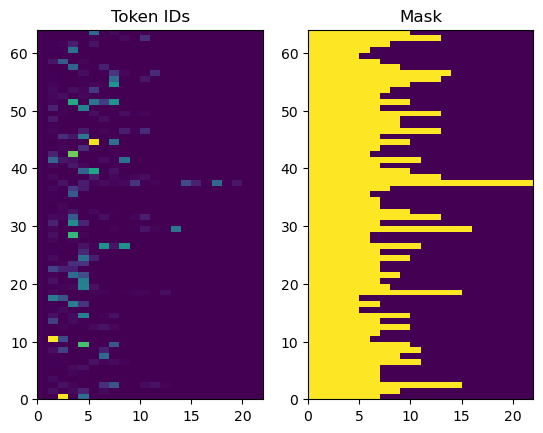

In [47]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title('Mask')


##### Process the dataset
The process_text function below converts the Datasets of strings, into 0-padded tensors of token IDs. It also converts from a (context, target) pair to an ((context, target_in), target_out) pair for training with keras.Model.fit. Keras expects (inputs, labels) pairs, the inputs are the (context, target_in) and the labels are target_out. The difference between target_in and target_out is that they are shifted by one step relative to eachother, so that at each location the label is the next token.

In [48]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)


In [49]:
# lets see the first sequence of each, from the first batch:

for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy()) 
  print()
  print(ex_tar_in[0, :10].numpy()) 
  print(ex_tar_out[0, :10].numpy())


[  2 934  95  45 263   4   3   0   0   0]

[  2 157  13 278 118   4   0   0   0   0]
[157  13 278 118   4   3   0   0   0   0]


### The encoder/decoder model

Before getting into it define constants for the model:

In [50]:
UNITS = 256

##### The encoder

The goal of the encoder is to process the context sequence into a sequence of vectors that are useful for the decoder as it attempts to predict the next output for each timestep. Since the context sequence is constant, there is no restriction on how information can flow in the encoder, so use a bidirectional-RNN to do the processing.

The encoder:

1. Takes a list of token IDs (from context_text_processor).
2. Looks up an embedding vector for each token (Using a layers.Embedding).
3. Processes the embeddings into a new sequence (Using a bidirectional layers.GRU).
4. Returns the processed sequence. This will be passed to the attention head.


In [51]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units

    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context


In [54]:
# Try it by encoding the input sequence.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')


Context tokens, shape (batch, s): (64, 16)
Encoder output, shape (batch, s, units): (64, 16, 256)


##### The attention layer

The attention layer lets the decoder access the information extracted by the encoder. It computes a vector from the entire context sequence, and adds that to the decoder's output.

The simplest way you could calculate a single vector from the entire sequence would be to take the average across the sequence (layers.GlobalAveragePooling1D). An attention layer is similar, but calculates a weighted average across the context sequence. Where the weights are calculated from the combination of context and "query" vectors.

In [55]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()

    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
        query=x,
        value=context,
        return_attention_scores=True)

    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')

    # Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x


In [56]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                  output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')


Context sequence, shape (batch, s, units): (64, 16, 256)
Target sequence, shape (batch, t, units): (64, 16, 256)
Attention result, shape (batch, t, units): (64, 16, 256)
Attention weights, shape (batch, t, s):    (64, 16, 16)


The attention weights will sum to 1 over the context sequence, at each location in the target sequence.

In [57]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1.        , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ], dtype=float32)

Here are the attention weights across the context sequences at t=0:

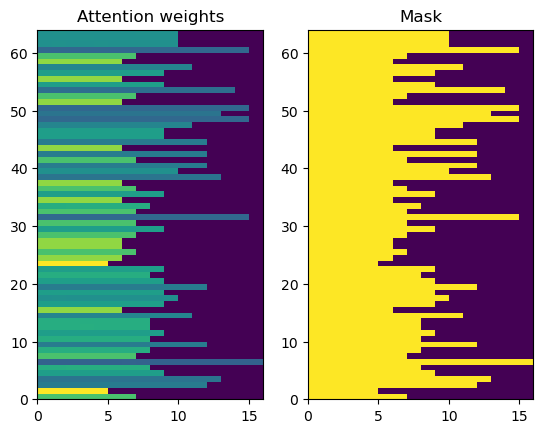

In [58]:
attention_weights = attention_layer.last_attention_weights
mask=(ex_context_tok != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask');


Because of the small-random initialization the attention weights are initially all close to 1/(sequence_length). The model will learn to make these less uniform as training progresses.

##### The decoder

The decoder's job is to generate predictions for the next token at each location in the target sequence.

1. It looks up embeddings for each token in the target sequence.
2. It uses an RNN to process the target sequence, and keep track of what it has generated so far.
3. It uses RNN output as the "query" to the attention layer, when attending to the encoder's output.
4. At each location in the output it predicts the next token.

When training, the model predicts the next word at each location. So it's important that the information only flows in one direction through the model. The decoder uses a unidirectional (not bidirectional) RNN to process the target sequence.

When running inference with this model it produces one word at a time, and those are fed back into the model.

In [59]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)


##### Training the Model

Next, the call method, takes 3 arguments:

* inputs - a context, x pair where:
    * context - is the context from the encoder's output.
    * x - is the target sequence input.
* state - Optional, the previous state output from the decoder (the internal state of the decoder's RNN). Pass the state from a previous run to continue generating text where you left off.
* return_state - [Default: False] - Set this to True to return the RNN state.


In [60]:
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):  
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits


That will be sufficient for training. Create an instance of the decoder to test out:

In [61]:
decoder = Decoder(target_text_processor, UNITS)

In training we can use the decoder like this:

Given the context and target tokens, for each target token it predicts the next target token. 

In [62]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (64, 16, 256)
input target tokens shape: (batch, t) (64, 16)
logits shape shape: (batch, target_vocabulary_size) (64, 16, 4204)


To use it for inference you'll need a couple more methods:

In [63]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True) 

  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)

  return next_token, done, state


With those extra functions, we can write a generation loop:

In [64]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()


array([b'foot colors towels sounds times things prayed smile none dresses',
       b'boss excitement fine blizzard matsushima skiing shorter passerby suggestion finger',
       b'fad tears puddle outside size gallons feed sides likes join'],
      dtype=object)

Since the model's untrained, it outputs items from the vocabulary almost uniformly at random.

##### The Model

Now that we have all the model components,  lets combine them to build the model for training:

In [65]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
      del logits._keras_mask
    except AttributeError:
      pass

    return logits


During training the model will be used like this:

In [66]:
model = Translator(UNITS, context_text_processor, target_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (64, 16)
Target tokens, shape: (batch, t) (64, 16)
logits, shape: (batch, t, target_vocabulary_size) (64, 16, 4204)


For training, we will want to implement our own masked loss and accuracy functions:

In [67]:
# mask function
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

# accuracy function
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)

    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)

    return tf.reduce_sum(match)/tf.reduce_sum(mask)


Configure the model for training:

In [68]:
model.compile(optimizer='adam',
              loss=masked_loss, 
              metrics=[masked_acc, masked_loss])

The model is randomly initialized, and should give roughly uniform output probabilities. So it's easy to predict what the initial values of the metrics should be:

In [69]:
vocab_size = 1.0 * target_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 8.343792, 'expected_acc': 0.0002378686964795433}

That should roughly match the values returned by running a few steps of evaluation:

In [70]:
model.evaluate(val_ds, steps=20, return_dict=True)

20/20 [==============================] - 19s 212ms/step - loss: 8.3519 - masked_acc: 2.9640e-04 - masked_loss: 8.3519


{'loss': 8.351922988891602,
 'masked_acc': 0.0002964002196677029,
 'masked_loss': 8.351922988891602}

Train the model

In [71]:
# this step takes a lot of time ~ 1 min per epoch (for me it was 12 min on CPU / no GPU )
history = model.fit(
    train_ds.repeat(), 
    epochs=100,
    steps_per_epoch = 100,
    validation_data=val_ds,
    validation_steps = 20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3)])


Epoch 1/100
100/100 [==============================] - 73s 569ms/step - loss: 4.8283 - masked_acc: 0.2879 - masked_loss: 4.8283 - val_loss: 3.9062 - val_masked_acc: 0.3907 - val_masked_loss: 3.9062
Epoch 2/100
100/100 [==============================] - 59s 584ms/step - loss: 3.4364 - masked_acc: 0.4384 - masked_loss: 3.4395 - val_loss: 3.0874 - val_masked_acc: 0.4797 - val_masked_loss: 3.0874
Epoch 3/100
100/100 [==============================] - 59s 589ms/step - loss: 2.6262 - masked_acc: 0.5350 - masked_loss: 2.6262 - val_loss: 2.6238 - val_masked_acc: 0.5463 - val_masked_loss: 2.6238
Epoch 4/100
100/100 [==============================] - 72s 724ms/step - loss: 2.2248 - masked_acc: 0.5915 - masked_loss: 2.2205 - val_loss: 2.2835 - val_masked_acc: 0.5935 - val_masked_loss: 2.2835
Epoch 5/100
100/100 [==============================] - 70s 703ms/step - loss: 1.6633 - masked_acc: 0.6721 - masked_loss: 1.6633 - val_loss: 2.2087 - val_masked_acc: 0.6200 - val_masked_loss: 2.2087
Epoch 6/10

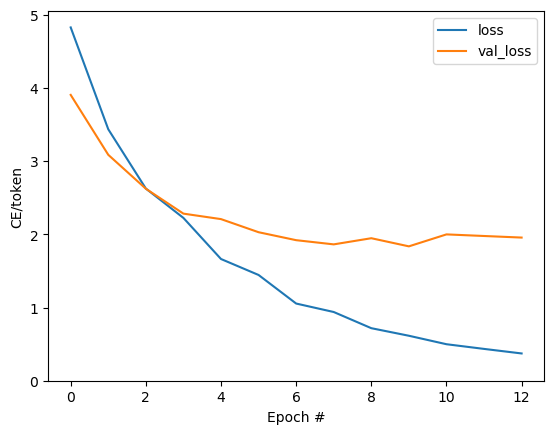

In [72]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

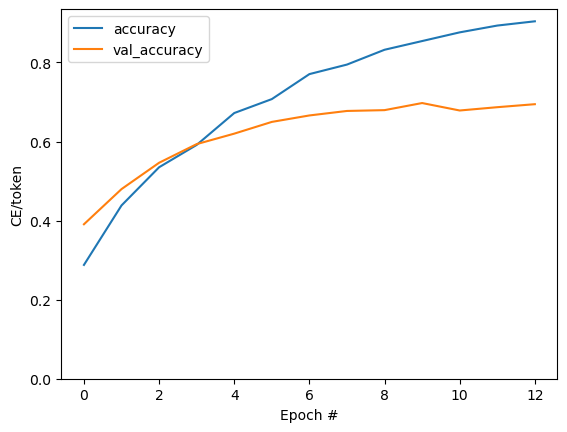

In [73]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

##### Translate

Now that the model is trained, implement a function to execute the full text => text translation. This code is basically identical to the inference example in the decoder section, but this also captures the attention weights.

In [74]:
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)

    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)

    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result


In [77]:
short_test_text = 'Още ли си вкъщи?'
result = model.translate([short_test_text]) # Are you still home
result[0].numpy().decode()

'are you still at home ? '

Lets use that to generate the attention plot:

In [79]:
@Translator.add_method
def plot_attention(self, text, **kwargs):
  assert isinstance(text, str)
  output = self.translate([text], **kwargs)
  output = output[0].numpy().decode()

  attention = self.last_attention_weights[0]

  context = tf_lower_and_split_punct(text)
  context = context.numpy().decode().split()

  output = tf_lower_and_split_punct(output)
  output = output.numpy().decode().split()[1:]

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + output, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')


C:\Users\Ivo\AppData\Local\Temp\ipykernel_12228\1396770852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
C:\Users\Ivo\AppData\Local\Temp\ipykernel_12228\1396770852.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)


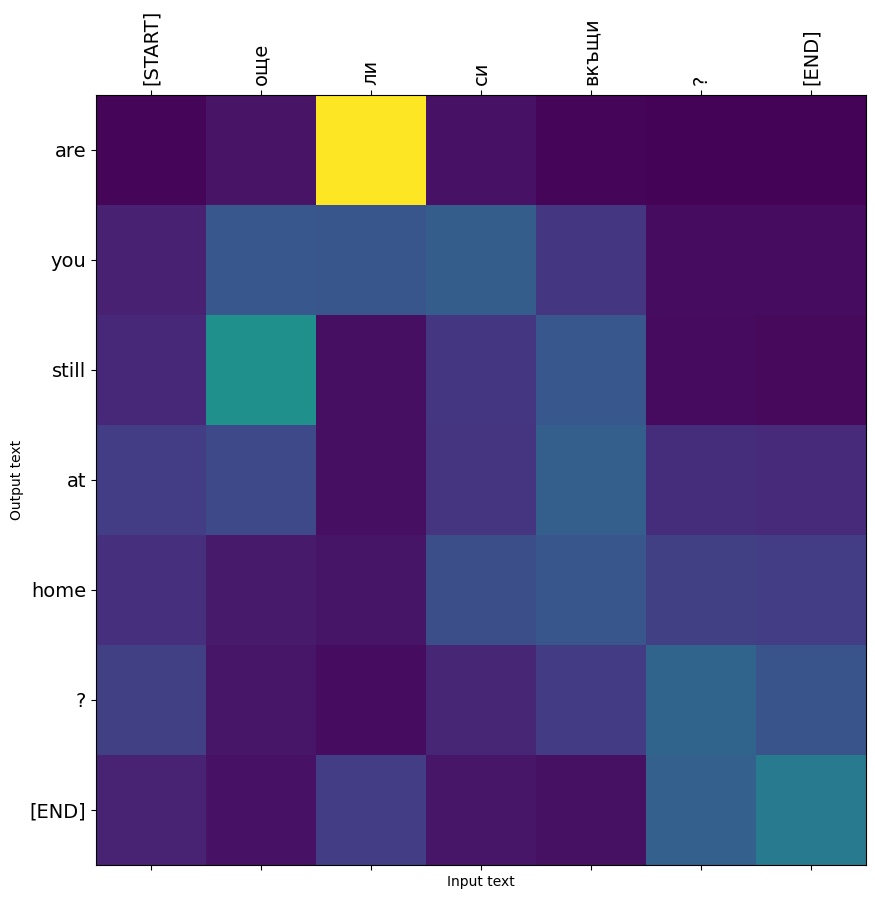

In [80]:
model.plot_attention(short_test_text) # Are you still home

C:\Users\Ivo\AppData\Local\Temp\ipykernel_12228\1396770852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
C:\Users\Ivo\AppData\Local\Temp\ipykernel_12228\1396770852.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)


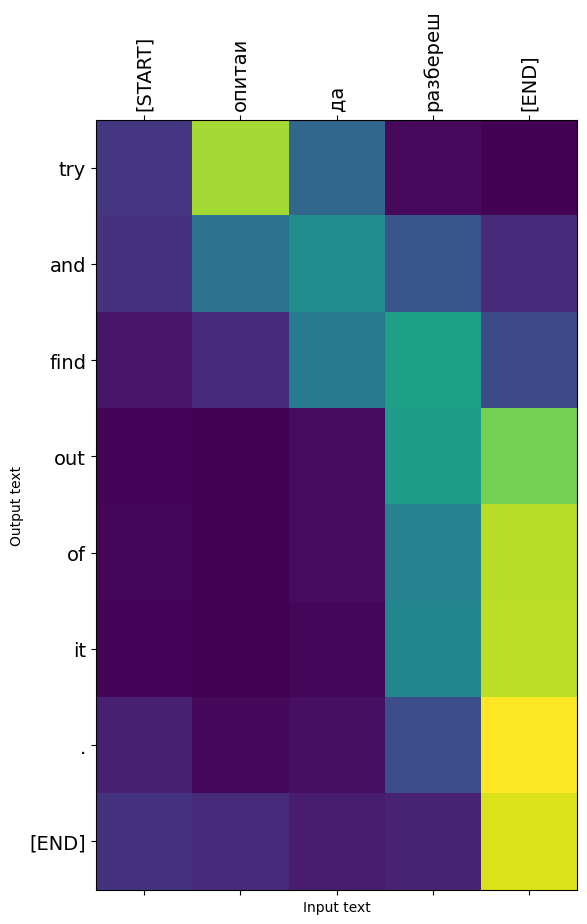

In [82]:
# Try it again
model.plot_attention('Опитай да разбереш')

C:\Users\Ivo\AppData\Local\Temp\ipykernel_12228\1396770852.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
C:\Users\Ivo\AppData\Local\Temp\ipykernel_12228\1396770852.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)


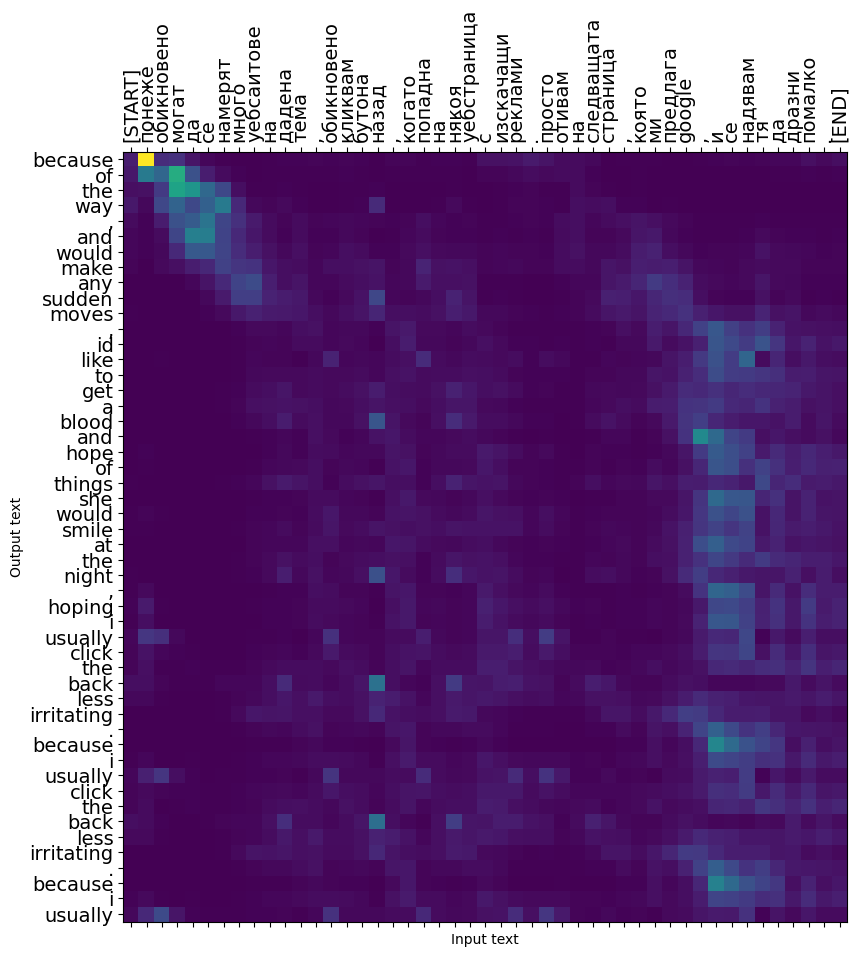

In [83]:
# Try longer text

long_text = context_raw[-1] # last sentence from the initial data file
model.plot_attention(long_text)

In [84]:
# Try baches
inputs = [
    'Наистина е студено тук.', # "It's really cold here."
    'Такъв е живота.', # "Such is life."
    'Стаята му е бъркотия.' # "His room is a mess"
]

for t in inputs:
  print(model.translate([t])[0].numpy().decode())


its really cold here . 
this is life . 
his room is clean the corner . 



##### Export the Model

Training the model takes time. Once trained the model can be exported by wrapping the translate method in a tf.function:

In [87]:
class Export(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
  def translate(self, inputs):
    return self.model.translate(inputs)


In [88]:
export = Export(model)

_ = export.translate(tf.constant(inputs))


In [89]:
# test wrapping
result = export.translate(tf.constant(inputs))

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())

its really cold here .                                             
this is life .                                              
his room is clean the corner .                                           


Now that the function has been traced it can be exported using saved_model.save:

In [90]:
tf.saved_model.save(export, 'translator',
                    signatures={'serving_default': export.translate})


INFO:tensorflow:Assets written to: translator\assets


INFO:tensorflow:Assets written to: translator\assets


In [91]:
# load model
reloaded = tf.saved_model.load('translator')
_ = reloaded.translate(tf.constant(inputs)) #warmup

In [92]:
# test loaded model
result = reloaded.translate(tf.constant(inputs))

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())


its really cold here .                                             
this is life .                                              
his room is clean the corner .                                           


In [96]:
# the last sentence is weird. Lets try to wiggle it a bit

new_inputs = [
'Стаята му е бъркотия.',
'В стаята му е бъркотия.',
'Стаята му е разхвърляна.',
'Стаята му не е подредена'
]

result = reloaded.translate(tf.constant(new_inputs))

print(result[0].numpy().decode())
print(result[1].numpy().decode())
print(result[2].numpy().decode())
print(result[3].numpy().decode())


his room is clean the corner .                                           
his room is hanging by the room .                                          
his room is clean the corner .                                           
his room isnt neat ?                                             


Very strange behaviour. Seems like the model does not do well on some words. Also adding prepositions seems to have large impact.

Lets try it with some random sentence from the Net (news atricle)

In [101]:
test_sent = 'Южна Европа се подготвя за лято на свирепа суша, като някои региони вече страдат от недостиг на вода и земеделските производители очакват най-лошите си добиви от десетилетия.'

output = reloaded.translate([test_sent])
print(test_sent)
print(output[0].numpy().decode())

Южна Европа се подготвя за лято на свирепа суша, като някои региони вече страдат от недостиг на вода и земеделските производители очакват най-лошите си добиви от десетилетия.
ive planned prepare for the most of my slippers down to the others that windsurfing was getting old than the peoples peoples who used used to live in making blood clothing than the peoples of numbers .             


Hilarious...

##### Other References:

[Text vectorization](https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/)

[Machine Translation](https://medium.com/mlearning-ai/na%C3%AFve-machine-translation-in-nlp-13cf02b9400)